###### IMPLEMENTATION OF POLYNOMIAL REGRESSION

<b> POLYNOMIAL REGRESSION </b> is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.
<br>**Polynomial Regression** fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x)

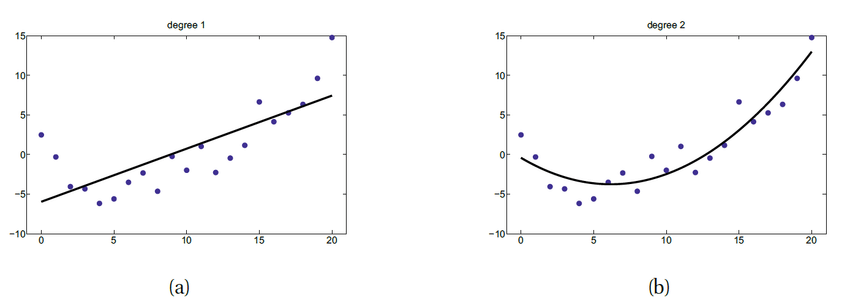

<b>Why Polynomial Regression:</b><br>

- There are some relationships that a researcher will hypothesize is curvilinear. Clearly, such type of cases will include a polynomial term.<br>
- Inspection of residuals. If we try to fit a linear model to curved data, a scatter plot of residuals (Y axis) on the predictor (X axis) will have patches of many positive residuals in the middle. Hence in such situation it is not appropriate.<br>
- An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.<br>

<b>Uses of Polynomial Regression:</b>

<br> These are basically used to define or describe non-linear phenomenon such as:

<br> - Growth rate of tissues.
<br> - Progression of disease epidemics
<br> - Distribution of carbon isotopes in lake sediments<br>
<br> The basic goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable x. In simple regression, we used following equation – <b> EQUATION: y = a + bx + e </b>


Here y is dependent variable, a is y intercept, b is the slope and e is the error rate.

In many cases, this linear model will not work out For example if we analyzing the production of chemical synthesis in terms of temperature at which the synthesis take place in such cases we use quadratic model <b> y = a + b1x + b2^2 + e </b>

Here y is dependent variable on x, a is y intercept and e is the error rate.

In general, we can model it for nth value. <b> y = a + b1x + b2x^2 +....+ bnx^n </b>

Since regression function is linear in terms of unknown variables, hence these models are linear from the point of estimation.

Hence through Least Square technique, let’s compute the response value that is y.

<b> Step 1: IMPORT LIBRARIES & DATASET </b><br>
Import the important libraries and the dataset we are using to perform Polynomial Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import os
os.chdir(r'C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\001_SUPERVISED_LEARNING\001_REGRESSION\002_POLYNOMIAL')
dataset = pd.read_csv('winequality-red.csv')
dataset.head(10)

###### EXPLORE DATASET FOR - WIDTH, HEIGHT & DEPTH

In [3]:
print(dataset.shape)
print('----------------------------------------------------------------------------------------------------------------------')
print(dataset.columns)
print('----------------------------------------------------------------------------------------------------------------------')
print(len(dataset.columns))
print('----------------------------------------------------------------------------------------------------------------------')
print(dataset.dtypes)
print('----------------------------------------------------------------------------------------------------------------------')
print("NUMBER OF NaN VALUES: ", dataset.isna().sum().sum())
print('----------------------------------------------------------------------------------------------------------------------')
dataset.describe()
print('----------------------------------------------------------------------------------------------------------------------')

(1599, 12)
----------------------------------------------------------------------------------------------------------------------
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------
12
----------------------------------------------------------------------------------------------------------------------
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
-----

###### CHECK COLUMN NAMES - RENAME IS SPACES ARE PRESENT IN BETWEEN ITS NAME - [FOR DECISION TREE]

In [201]:
dataset.columns

Index(['fixed_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
dataset.rename(columns = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity':'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide',
    },
               inplace = True)

###### CHECK NUMBER OF TIMES A VALUE IS REPEATED IN A COLUMN

In [68]:
pd.DataFrame(dataset.pivot_table(index = ['fixed_acidity'], aggfunc = 'size')).head(50)

,0
fixed_acidity,
4.6,1
4.7,1
4.9,1
5.0,6
5.1,4
5.2,6
5.3,4
5.4,5
5.5,1


###### PLOT A PAIRPLOT FOR A OVERALL VIEW ABOUT CORRELATION UNDERSTANDING

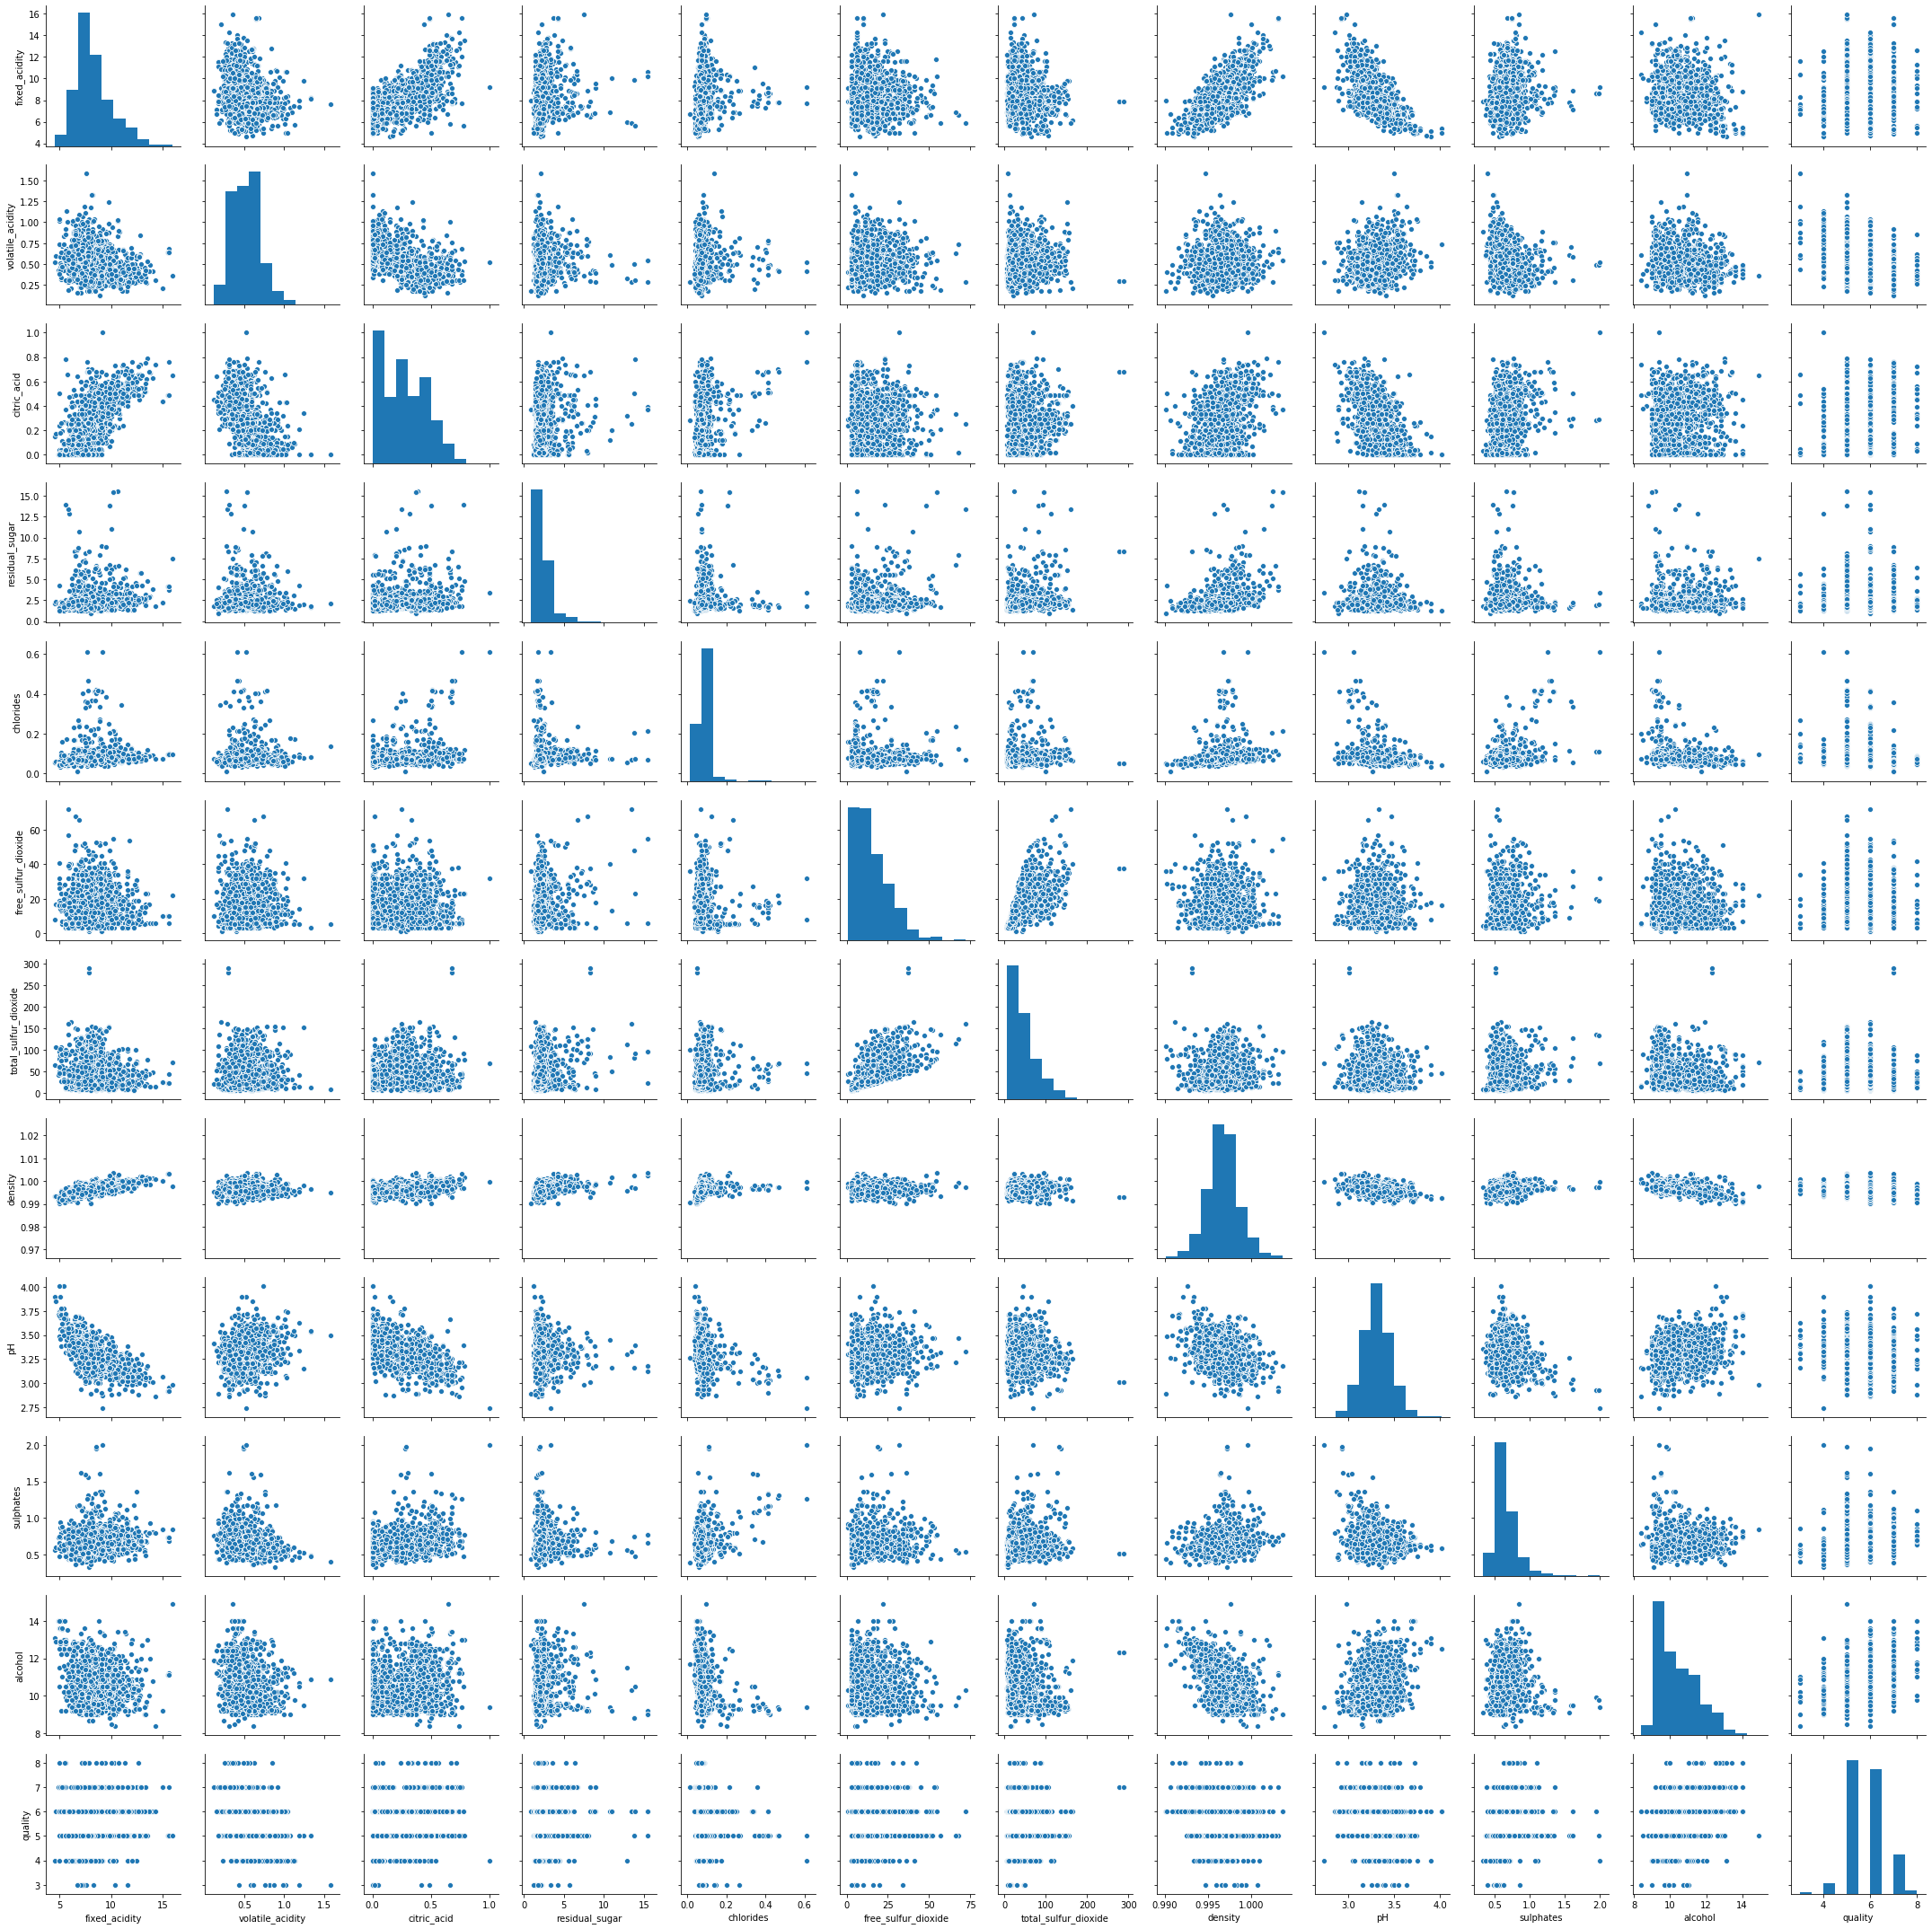

In [9]:
import seaborn as sns
sns.pairplot(dataset)

###### DRAW A CORRELATION TABLE TO CHECK STRONG & WEAK RELATIONSHIP BETWEEN COLUMNS

In [91]:
corr = dataset.corr()
pd.DataFrame(corr.round(2))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile_acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric_acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual_sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free_sulfur_dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total_sulfur_dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [97]:
print(corr['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64 



###### DRAW  A HEATMAP

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity                  1.00             -0.26         0.67   
volatile_acidity              -0.26              1.00        -0.55   
citric_acid                    0.67             -0.55         1.00   
residual_sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free_sulfur_dioxide           -0.15             -0.01        -0.06   
total_sulfur_dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
quality                        0.12             -0.39         0.23   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

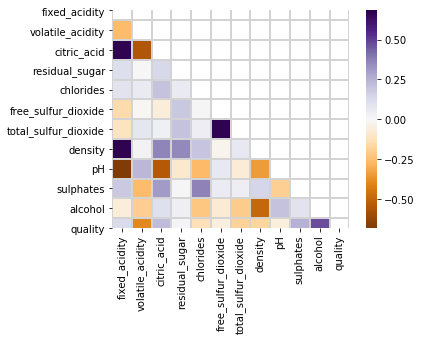

In [13]:
corr = dataset.corr()
print(corr.round(2))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True #delete top half of triangle

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr,
            mask = mask,
            cmap = plt.cm.PuOr,
            vmin = -vmax,
            vmax = vmax,
            square = True,
            linecolor = "lightgrey",
            linewidths = 1,
            ax = ax)
plt.show()

###### MOST CORELATED COLUMN HEATMAP - K = 7

All COLUMNS:  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
------------------------------------------
MOST CORELATED Columns:  Index(['quality', 'alcohol', 'sulphates', 'citric_acid', 'fixed_acidity',
       'residual_sugar', 'free_sulfur_dioxide'],
      dtype='object')


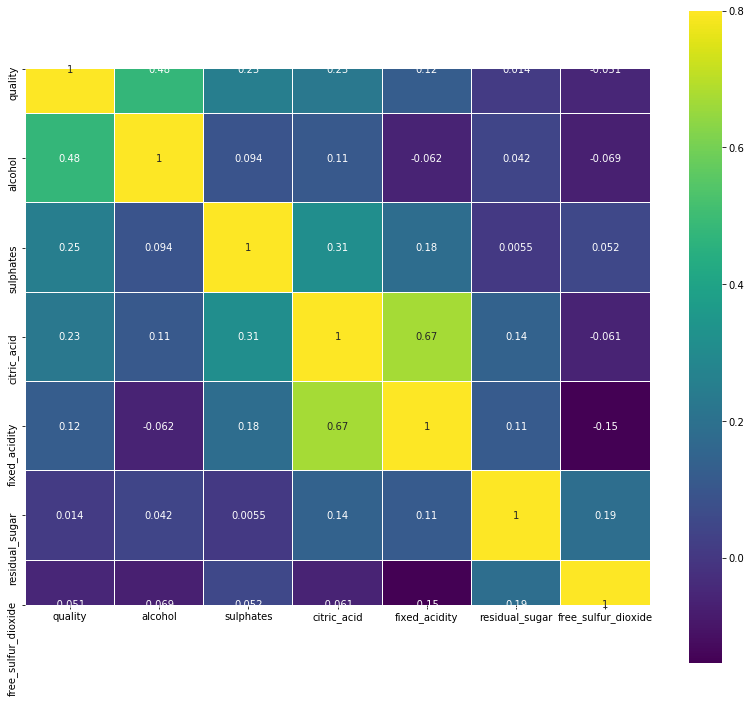

In [124]:
corr = dataset.corr()
print("All COLUMNS: ", dataset.columns)
print('------------------------------------------')
k = 7
cols = corr.nlargest(k,'quality')['quality'].index
print("MOST CORELATED Columns: ", cols)

cm = np.corrcoef(dataset[cols].values.T)
f, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, vmax = .8, linewidths = 0.01, square = True,
            annot = True, cmap = 'viridis', linecolor = 'white',
            xticklabels = cols.values, annot_kws = {'size':10},
            yticklabels = cols.values)

###### DROP LEAST CORELATED COLUMNS

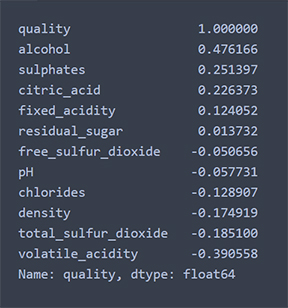

In [125]:
df_coreltd_cols = dataset

In [132]:
df_coreltd_cols.drop(df_coreltd_cols.columns[[1, 4, 6, 7, 8]], axis = 1, inplace = True)

###### CHECK FOR OUTLIERS - By min and max values

In [134]:
df_coreltd_cols.head()

,fixed_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,sulphates,alcohol,quality
0,7.4,0.00,1.9,11.0,0.56,9.4,5
1,7.8,0.00,2.6,25.0,0.68,9.8,5
2,7.8,0.04,2.3,15.0,0.65,9.8,5
3,11.2,0.56,1.9,17.0,0.58,9.8,6
4,7.4,0.00,1.9,11.0,0.56,9.4,5


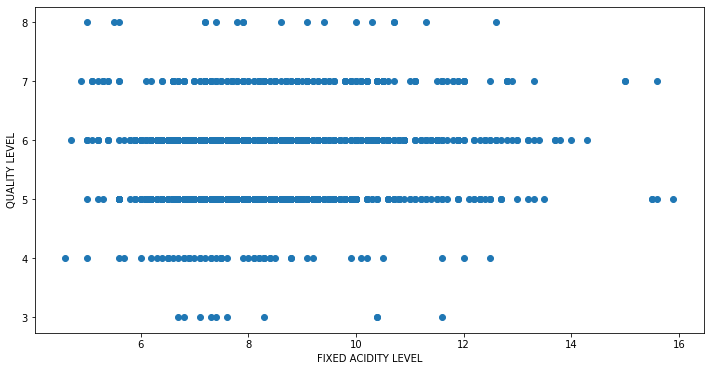

In [137]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_coreltd_cols['fixed_acidity'], df_coreltd_cols['quality'])
ax.set_xlabel('FIXED ACIDITY LEVEL')
ax.set_ylabel('QUALITY LEVEL')
plt.show()

In [138]:
df_coreltd_cols.describe()

,fixed_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,2.538806,15.874922,0.658149,10.422983,5.636023
std,1.741096,0.194801,1.409928,10.460157,0.169507,1.065668,0.807569
min,4.600000,0.000000,0.900000,1.000000,0.330000,8.400000,3.000000
25%,7.100000,0.090000,1.900000,7.000000,0.550000,9.500000,5.000000
50%,7.900000,0.260000,2.200000,14.000000,0.620000,10.200000,6.000000
75%,9.200000,0.420000,2.600000,21.000000,0.730000,11.100000,6.000000
max,15.900000,1.000000,15.500000,72.000000,2.000000,14.900000,8.000000


In [142]:
val_max = [15.900000, 1.000000, 15.500000, 72.000000, 2.000000, 14.900000, 8.000000]
val_min = [4.600000, 0.000000, 0.900000, 1.000000, 0.330000, 8.400000, 3.000000]

print('fixed_acidity, citric_acid, residual_sugar, free_sulfur_dioxide, sulphates, alcohol, quality')

list(np.array(val_max) - np.array(val_min))

fixed_acidity, citric_acid, residual_sugar, free_sulfur_dioxide, sulphates, alcohol, quality


[11.3, 1.0, 14.6, 71.0, 1.67, 6.5, 5.0]

###### BOXPLOT

In [ ]:
import seaborn as sns

AxesSubplot(0.125,0.125;0.775x0.755)


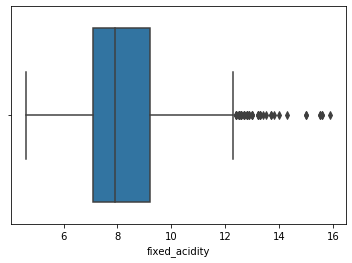

In [149]:
#dataset.boxplot(column = 'fixed_acidity')
print(sns.boxplot(x = df_coreltd_cols['fixed_acidity']))

AxesSubplot(0.125,0.125;0.775x0.755)


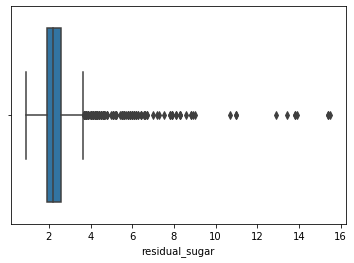

In [150]:
print(sns.boxplot(x = df_coreltd_cols['residual_sugar']))

AxesSubplot(0.125,0.125;0.775x0.755)


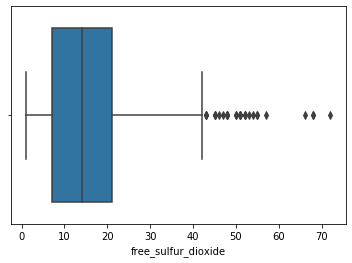

In [151]:
print(sns.boxplot(x = df_coreltd_cols['free_sulfur_dioxide']))

AxesSubplot(0.125,0.125;0.775x0.755)


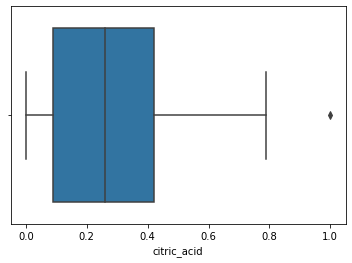

In [152]:
print(sns.boxplot(x = df_coreltd_cols['citric_acid']))

AxesSubplot(0.125,0.125;0.775x0.755)


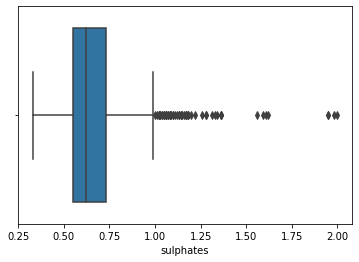

In [153]:
print(sns.boxplot(x = df_coreltd_cols['sulphates']))

AxesSubplot(0.125,0.125;0.775x0.755)


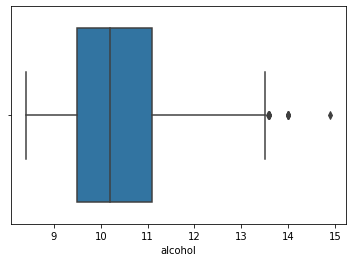

In [154]:
print(sns.boxplot(x = df_coreltd_cols['alcohol']))

<Figure size 1152x864 with 0 Axes>

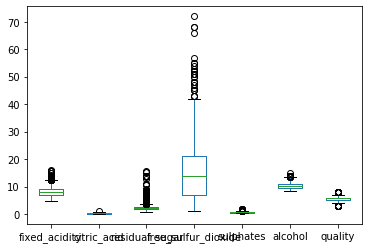

<Figure size 1152x864 with 0 Axes>

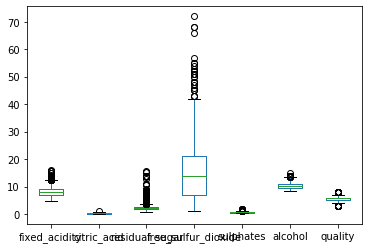

<Figure size 1152x864 with 0 Axes>

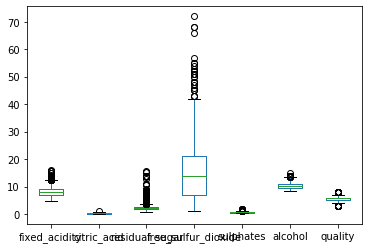

<Figure size 1152x864 with 0 Axes>

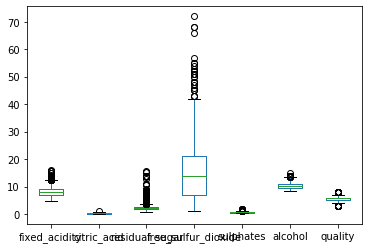

<Figure size 1152x864 with 0 Axes>

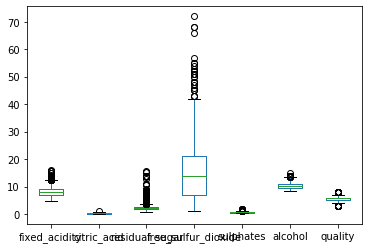

<Figure size 1152x864 with 0 Axes>

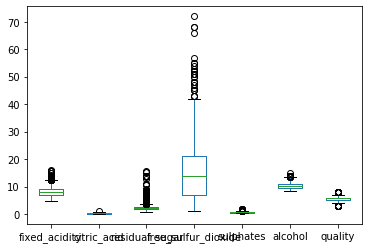

<Figure size 1152x864 with 0 Axes>

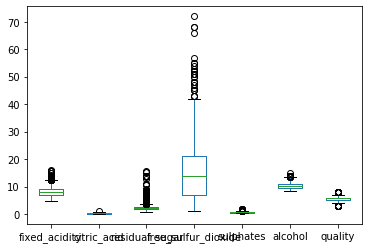

In [156]:
import matplotlib.pyplot as plt

for column in df_coreltd_cols:
    plt.figure(figsize=(16,12))
    df_coreltd_cols.plot(kind='box')
#    dataset.boxplot([column])

###### FINDING INTERQUARTILE RANGE - IQR

In [157]:
Q1 = df_coreltd_cols.quantile(0.25)
Q3 = df_coreltd_cols.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed_acidity           2.10
citric_acid             0.33
residual_sugar          0.70
free_sulfur_dioxide    14.00
sulphates               0.18
alcohol                 1.60
quality                 1.00
dtype: float64


In [158]:
print(df_coreltd_cols < (Q1 - 1.5 * IQR)) | (df_coreltd_cols > (Q3 + 1.5 * IQR))

      fixed_acidity  citric_acid  residual_sugar  free_sulfur_dioxide  \
0             False        False           False                False   
1             False        False           False                False   
2             False        False           False                False   
3             False        False           False                False   
4             False        False           False                False   
...             ...          ...             ...                  ...   
1594          False        False           False                False   
1595          False        False           False                False   
1596          False        False           False                False   
1597          False        False           False                False   
1598          False        False           False                False   

      sulphates  alcohol  quality  
0         False    False    False  
1         False    False    False  
2         False

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

###### Z-SCORE - To find Outliers

In [159]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_coreltd_cols))
threshold = 3
pd.DataFrame(np.where(z > 3))
print(np.where(z > 3))

(array([  13,   14,   15,   17,   33,   43,   57,   81,   86,   88,   91,
         92,  106,  142,  144,  151,  151,  163,  164,  169,  226,  243,
        244,  258,  274,  324,  325,  339,  340,  347,  374,  381,  391,
        396,  396,  400,  400,  442,  459,  467,  480,  494,  517,  544,
        554,  555,  557,  584,  588,  595,  614,  639,  649,  652,  652,
        652,  690,  692,  723,  795,  821,  832,  899,  911,  917,  923,
        925,  926,  982, 1043, 1051, 1071, 1074, 1079, 1081, 1131, 1154,
       1175, 1186, 1231, 1235, 1244, 1244, 1269, 1270, 1288, 1289, 1295,
       1296, 1299, 1319, 1358, 1367, 1370, 1372, 1374, 1434, 1434, 1435,
       1435, 1469, 1474, 1474, 1476, 1476, 1478, 1505, 1558, 1574, 1589],
      dtype=int64), array([4, 3, 3, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 5, 5, 1, 4, 2, 2, 4, 4, 0,
       0, 4, 2, 2, 2, 4, 4, 0, 0, 0, 0, 2, 3, 2, 3, 0, 6, 5, 2, 2, 6, 0,
       0, 0, 0, 3, 5, 2, 4, 4, 2, 0, 2, 5, 6, 4, 4, 4, 5, 6, 6, 2, 2, 2,
       3, 3, 3, 2, 4, 2, 2, 2

In [184]:
pd.DataFrame(np.where(z > 3))
stck = pd.DataFrame(np.where(z > 3))
stck.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,13,14,15,17,33,43,57,81,86,88,...,1469,1474,1474,1476,1476,1478,1505,1558,1574,1589
1,4,3,3,4,2,4,3,4,4,4,...,6,2,3,2,3,6,6,3,2,2


In [183]:
print(z[14][3])
#print (df_coreltd_cols.iloc[14, 3])
#print (df_coreltd_cols.loc[1475, 'citric_acid'])
#print(df_coreltd_cols[1468][6])

3.454668962073944


In [189]:
dfNoOutliers_ZS = df_coreltd_cols[(z < 3).all(axis = 1)]

In [190]:
print(df_coreltd_cols.shape)
print(dfNoOutliers_ZS.shape)

(1599, 7)
(1499, 7)


In [191]:
1599 - 1499

100

###### CREATE TRAIN & TEST SPLIT - INTO TRAIN-SET and TEST-SET

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [203]:
multi_linr_reg = LinearRegression()

In [233]:
X = dfNoOutliers_ZS.iloc[:, 0:6]
X.head()

,fixed_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,sulphates,alcohol
0,7.4,0.00,1.9,11.0,0.56,9.4
1,7.8,0.00,2.6,25.0,0.68,9.8
2,7.8,0.04,2.3,15.0,0.65,9.8
3,11.2,0.56,1.9,17.0,0.58,9.8
4,7.4,0.00,1.9,11.0,0.56,9.4


In [234]:
y = dfNoOutliers_ZS.iloc[:, -1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [236]:
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

X_train:  1049
X_test:  450
y_train:  1049
y_test:  450


In [237]:
multi_linr_reg.fit(X_train, y_train)

LinearRegression()

In [238]:
pd.DataFrame(multi_linr_reg.coef_)

,0
0,0.033084
1,0.239336
2,-0.033436
3,0.000288
4,1.623061
5,0.337984


In [239]:
y_pred = multi_linr_reg.predict(X_test)

In [243]:
dfNoOutliers_ZS.head(10)

,fixed_acidity,citric_acid,residual_sugar,free_sulfur_dioxide,sulphates,alcohol,quality
0,7.4,0.00,1.9,11.0,0.56,9.4,5
1,7.8,0.00,2.6,25.0,0.68,9.8,5
2,7.8,0.04,2.3,15.0,0.65,9.8,5
3,11.2,0.56,1.9,17.0,0.58,9.8,6
4,7.4,0.00,1.9,11.0,0.56,9.4,5
5,7.4,0.00,1.8,13.0,0.56,9.4,5
6,7.9,0.06,1.6,15.0,0.46,9.4,5
7,7.3,0.00,1.2,15.0,0.47,10.0,7
8,7.8,0.02,2.0,9.0,0.57,9.5,7
9,7.5,0.36,6.1,17.0,0.80,10.5,5


In [241]:
pd.DataFrame(y_pred).head(10)

,0
0,6.157221
1,5.569483
2,5.647417
3,6.731285
4,5.143983
5,5.327881
6,5.625850
7,6.258196
8,5.845760
9,6.355623


In [244]:
multi_linr_reg.predict([[11.2, 0.56, 1.9, 17.0, 0.58, 9.8]])

array([5.5351805])

###### CALCUALTE VIF FOR VERIFICATION

###### MANUALLY CALCULATE VIF VALUE

In [245]:
r_square = multi_linr_reg.score(X, y)
r_square * 100

32.67988921572067

In [246]:
1 / (1 - r_square)

1.4854402174179446

###### IMPORT LIBRARIES TO CALCUALTE VIF VALUES

In [225]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import DataFrame, Series
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [247]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [248]:
calc_vif(X)

,variables,VIF
0,fixed_acidity,34.346103
1,citric_acid,4.912797
2,residual_sugar,9.022338
3,free_sulfur_dioxide,3.546263
4,sulphates,26.193983
5,alcohol,41.143234


###### FITTING POLYNOMIAL REGRESSION ON OUR DATASET

In [249]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

###### VISUALIZING LINEAR REGRESSION RESULTS

ValueError: x and y must be the same size

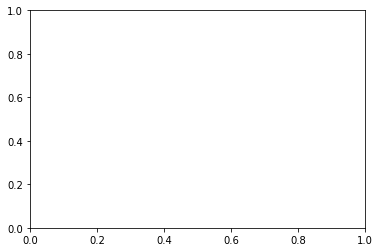

In [250]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()